# Crear índice de conectividad de colectivos

El indicador propuesto se basa en una estimación de la superficie de la CABA a la que pueden acceder (en promedio) los habitantes de un radio censal, si están dispuestos a recorrer 10 km en cualquiera de las líneas de colectivos que están a 300 metros de su alcance.

In [115]:
import shapefile
import pandas as pd
from scripts.path_finders import get_transport_shp_path, get_division_path
from scripts.geo_utils import iter_shp_as_shapely, get_shapely_shapes
from scripts.reachability import gen_reachable_polygon, calc_reachable_surface_and_people
import scripts.reachability as reachability
from shapely.geometry import LineString, Point, Polygon, MultiPolygon, MultiPoint

In [23]:
path_colectivos = get_transport_shp_path("recorrido-colectivos")
path_radios = get_division_path("radios_censo_2010")

In [24]:
sf_lines = shapefile.Reader(path_colectivos)
lines = get_shapely_shapes(sf_lines)

In [25]:
sf_polys = shapefile.Reader(path_radios)
polys = get_shapely_shapes(sf_polys)
ids = [record[0] for record in sf_polys.records()]
radios = {id: polygon for id, polygon in zip(ids, polys)}

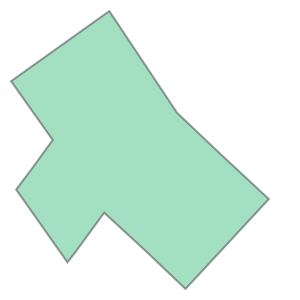

In [30]:
radio = radios["14_1_8"]
radio

11


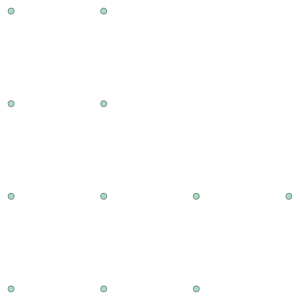

In [31]:
points = gen_grid_points(radio, 100)
print len(points)
MultiPoint(points)

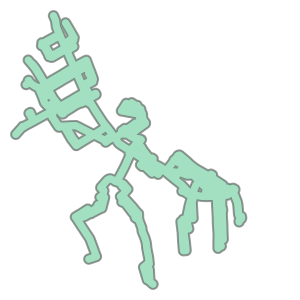

In [100]:
surface = gen_reachable_polygon(points[0].buffer(300), lines)
surface

In [101]:
calc_reachable_surface_and_people(radio, lines, print_points=True)

POINT (101731.5859375 106827.9375) 60.5998341201
POINT (101731.5859375 106927.9375) 24.814852391
POINT (101731.5859375 107027.9375) 47.3344455688
POINT (101731.5859375 107127.9375) 48.2188536852
POINT (101831.5859375 106827.9375) 59.8096090334
POINT (101831.5859375 106927.9375) 24.7878409842
POINT (101831.5859375 107027.9375) 50.6219352909
POINT (101831.5859375 107127.9375) 51.1607310691
POINT (101931.5859375 106827.9375) 24.8007875209
POINT (101931.5859375 106927.9375) 51.0223160745
POINT (102031.5859375 106927.9375) 51.9127347419


45.007630952739831

Cálculo del indicador "reach_area" a nivel de radio censal. El procedimiento realizado para los 3553 radios censales puede tomar varias horas. La variable "limit" permite ir calculando el indicador en tandas más chicas, los valores ya calculados no se recalculan (permanecen en el csv correspondiente a los indicadores de RADIO o FRACCIÓN CENSAL).

In [148]:
reachability.main(area_level="RADIO")

9_16_1     222/1766 in 23.92 mins. Average: 0.11 Time to end: 166.36
Interrupted!
Saving values... Done.


In [135]:
reachability.main(area_level="FRAC")

KeyError: u'reach_area'